In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.utils import plot_model
from keras import backend as K
import keras


In [2]:
# Load your dataset here (assuming it's in CSV format, adjust accordingly)
df = pd.read_csv('data_interpolated.csv')
df.head()


,Sno,day,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH)
0,1,6,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
1,2,7,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
2,3,1,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
3,4,2,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
4,5,3,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178


In [3]:
df = df.drop(columns=['Sno', 'day'])
df.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH)
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178


In [4]:
# Convert 'timestamp' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract year, month, and day into separate columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


In [5]:
df.columns

Index(['Date', 'Load', 'GDP Growth', 'per capita GDP us dollar',
       'Access to electricty(% population)', 'min temp c', 'meantemp c',
       'max temp c', 'precipitation(mm)', 'No of consumer',
       'Total Availiability (GWH)', 'year', 'month', 'day'],
      dtype='object')

In [6]:
df.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


In [7]:
df.set_index("Date", inplace=True)

In [8]:
df.head()

,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
Date,,,,,,,,,,,,,
2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


In [9]:
df.columns

Index(['Load', 'GDP Growth', 'per capita GDP us dollar',
       'Access to electricty(% population)', 'min temp c', 'meantemp c',
       'max temp c', 'precipitation(mm)', 'No of consumer',
       'Total Availiability (GWH)', 'year', 'month', 'day'],
      dtype='object')

In [19]:
selected_features = ['GDP Growth', 'per capita GDP us dollar',
       'Access to electricty(% population)', 'min temp c', 'meantemp c',
       'max temp c', 'precipitation(mm)', 'No of consumer',
       'Total Availiability (GWH)', 'year', 'month', 'day']
load_values = df['Load'].values
feature_values = df[selected_features].values

In [20]:
load_values.shape, feature_values.shape

((3933,), (3933, 12))

In [21]:
# Normalize the data between 0 and 1 (LSTM models perform better with scaled data)
scaler_load = MinMaxScaler(feature_range=(0, 1))
scaler_features = MinMaxScaler(feature_range=(0, 1))

scaled_load_values = scaler_load.fit_transform(load_values.reshape(-1, 1))
scaled_feature_values = scaler_features.fit_transform(feature_values)

In [22]:
scaled_load_values.shape, scaled_feature_values.shape

((3933, 1), (3933, 12))

In [23]:
# Define the number of time steps (lookback) to consider for each prediction
lookback = 7 # For example, use the last 7 days to predict the 1 week load

X, y = [], []
for i in range(lookback, len(scaled_load_values)):
    X.append(scaled_load_values[i - lookback:i])
    y.append(scaled_load_values[i, 0])

X, y = np.array(X), np.array(y)

# Reshape the input data to match LSTM input shape (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [24]:
X.shape, y.shape

((3926, 7, 1), (3926,))

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train:  (3140, 7, 1)
Shape of X_test:  (786, 7, 1)
Shape of y_train:  (3140,)
Shape of y_test:  (786,)


In [18]:
# Build the LSTM model
def lstm_model1():    
    model = Sequential()

    # Add LSTM layers
    model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1,1])))
    model.add(Dropout(0.2))  # Optional dropout layer for regularization
    model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1,1])))
    model.add(Dropout(0.2))  # Optional dropout layer for regularization
    model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1,1])))
    model.add(Dropout(0.2))  # Optional dropout layer for regularization
    model.add(Dense(units=1))  # Output layer for load prediction

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    
    return model
    

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(layers.LSTM(units=64, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Build the LSTM Model
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
# model.add(Dropout(0.2))  # Add a dropout layer with a dropout rate of 0.2
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))  # Add a dropout layer with a dropout rate of 0.2
# model.add(LSTM(64))
# model.add(Dropout(0.2))  # Add a dropout layer with a dropout rate of 0.2
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

# model.summary()
# plot_model(model, to_file='LSTM_Model_Load_Forecating.png', show_shapes = True)

In [ ]:
# Training parameters
epochs = 100
batch_size = 32

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split = 0.2 )

In [18]:
# saving model
model.save("LSTM_LoadForecasting_With_features_100_Epoch.h5")

In [19]:
def plot_train_validation_graph(history, file_name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(loss))

    plt.figure(figsize=(8, 6), dpi=100)
      
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Epoches')
    plt.ylabel('MSE')
    plt.title('Training Vs Validation Loss')
    plt.savefig(file_name + ".png")
    plt.tight_layout(pad=1.0)
    plt.grid(True)
    plt.legend()
    plt.show()

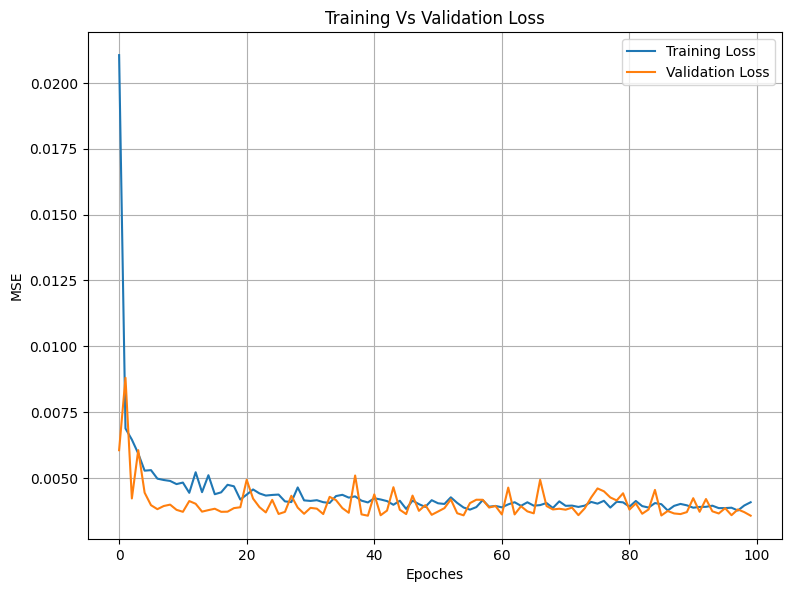

In [20]:
plot_train_validation_graph(history, "Trining Vs Validation loss graph for LSTM 100 epoch.png")

In [21]:
# Make predictions on the test set
predicted_scaled_load_values = model.predict(X_test)

# Inverse transform to get actual load values
predicted_load_values = scaler_load.inverse_transform(predicted_scaled_load_values)
actual_load_values = scaler_load.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(actual_load_values, predicted_load_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_load_values, predicted_load_values)
r2 = r2_score(actual_load_values, predicted_load_values)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


2023-08-07 12:02:46.941096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-07 12:02:46.942544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-07 12:02:46.944191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/23 [==============================] - 1s 7ms/step
Mean Squared Error: 2628.7239585569105
Root Mean Squared Error: 51.2710830640129
Mean Absolute Error: 32.780650227639164
R-squared Score: 0.9247688492365481


In [24]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(actual_load_values, predicted_load_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 2.63%


In [25]:
actual_load_values.shape, predicted_load_values.shape

((722, 1), (722, 1))

In [26]:
#flatten the values of actual and predicted load
actual_load_values = actual_load_values.flatten()
predicted_load_values = predicted_load_values.flatten()

In [27]:
dataframe = pd.DataFrame({
    "Actual_Load":actual_load_values,
    "Predicted_Load":predicted_load_values
})

In [28]:
dataframe

,Actual_Load,Predicted_Load
0,1511.00000,1510.632568
1,1136.60000,1146.191284
2,977.40000,975.808960
3,1250.45000,1241.120239
4,1015.30000,1017.851318
...,...,...
717,956.62375,985.768616
718,1397.00000,1397.571899
719,1025.70000,1023.848206
720,1078.13000,1073.637573


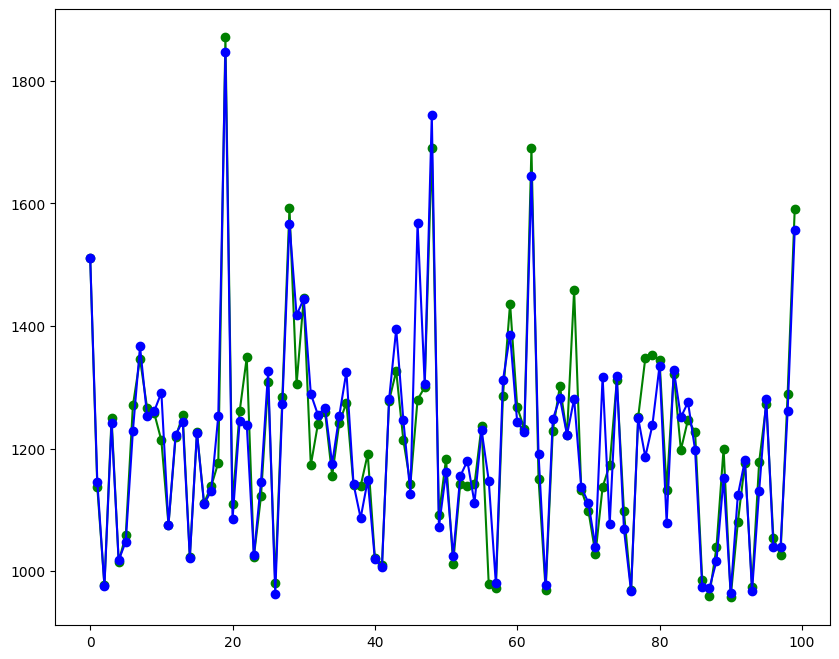

In [29]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(dataframe["Actual_Load"][:100], marker='o', color='g')
plt.plot(dataframe["Predicted_Load"][:100], marker='o', color='b')

In [31]:
test_data_fraction = 0.2
total_rows = len(df)
test_data_size = int(total_rows * test_data_fraction)
test_data = df.iloc[-test_data_size:]

In [32]:
test_data_start_index = test_data.index[0]
test_data_end_index = test_data.index[-1]
print("Start index of test dataset:", test_data_start_index)
print("End index of test dataset:", test_data_end_index)

Start index of test dataset: 2021-04-06 00:00:00
End index of test dataset: 2023-04-13 00:00:00


In [46]:
len(test_data.index), len(test_data), len(dataframe), len

(723, 723, 722)

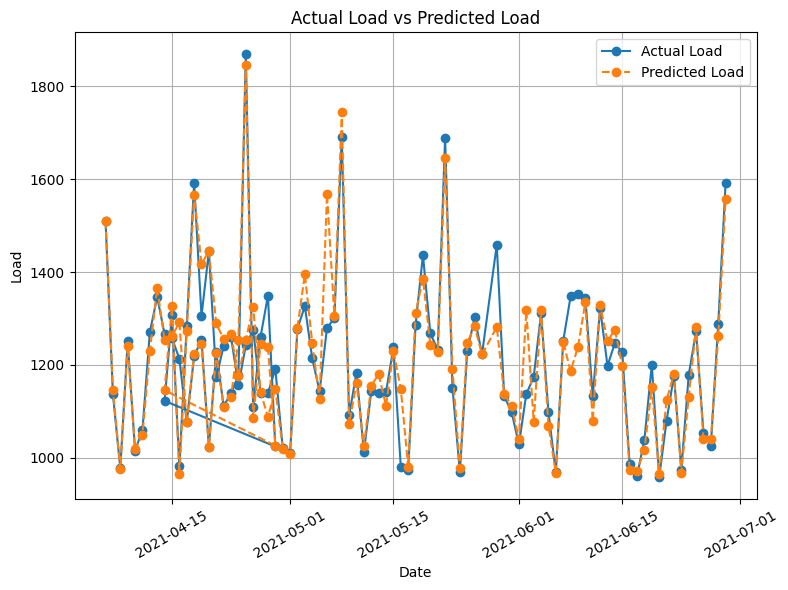

In [33]:
# first 100 data test prediction graph
plt.figure(figsize=(8,6), dpi=100)
plt.plot(test_data.index[:100], dataframe["Actual_Load"][:100], label="Actual Load", marker='o')
plt.plot(test_data.index[:100], dataframe["Predicted_Load"][:100], marker='o',label="Predicted Load", linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Actual Load vs Predicted Load')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Load prediction graph 1.png")
plt.show()

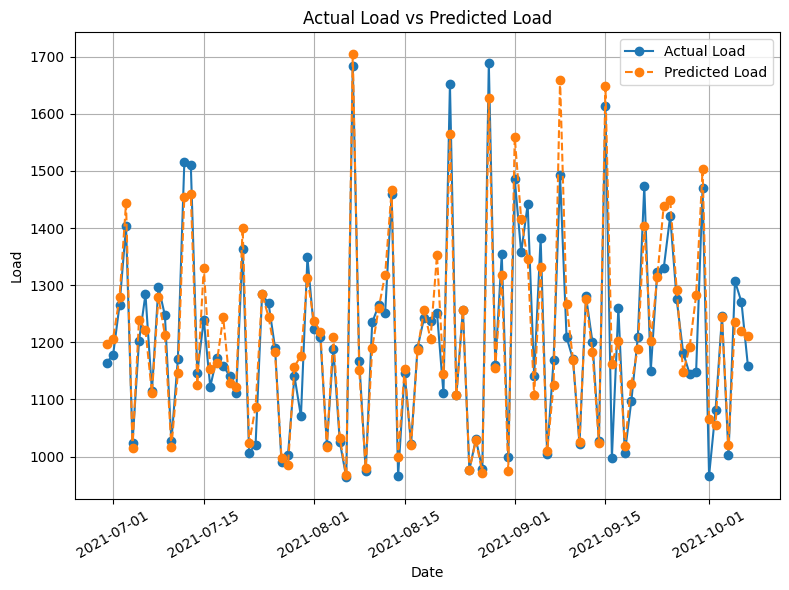

In [34]:
# second 100 test data prediction graph
plt.figure(figsize=(8,6), dpi=100)
plt.plot(test_data.index[100:200], dataframe["Actual_Load"][100:200], label="Actual Load", marker='o')
plt.plot(test_data.index[100:200], dataframe["Predicted_Load"][100:200], marker='o',label="Predicted Load", linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Actual Load vs Predicted Load')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Load prediction graph 2.png")
plt.show()

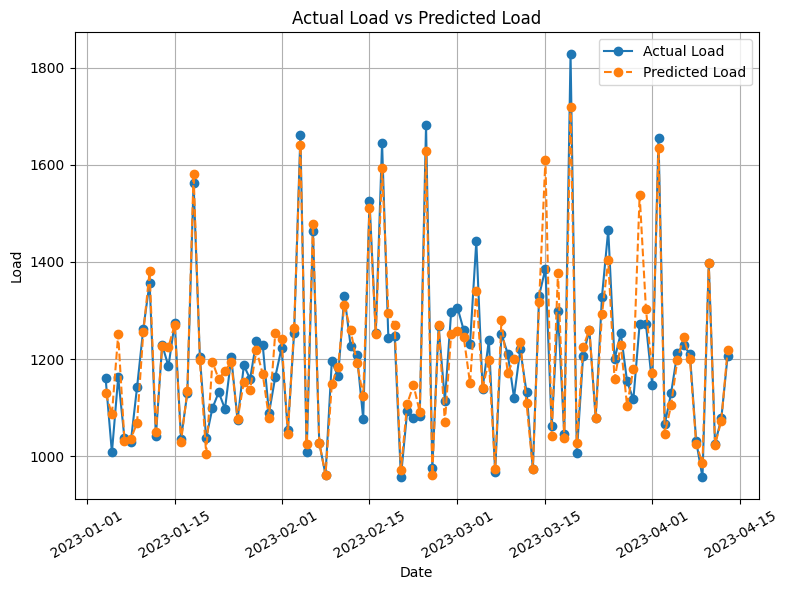

In [35]:
# last 100 test data prediction graph
plt.figure(figsize=(8,6), dpi=100)
plt.plot(test_data.index[-100:], dataframe["Actual_Load"][-100:], label="Actual Load", marker='o')
plt.plot(test_data.index[-100:], dataframe["Predicted_Load"][-100:], marker='o',label="Predicted Load", linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Actual Load vs Predicted Load')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Load prediction graph 3.png")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (723,) and (722,)

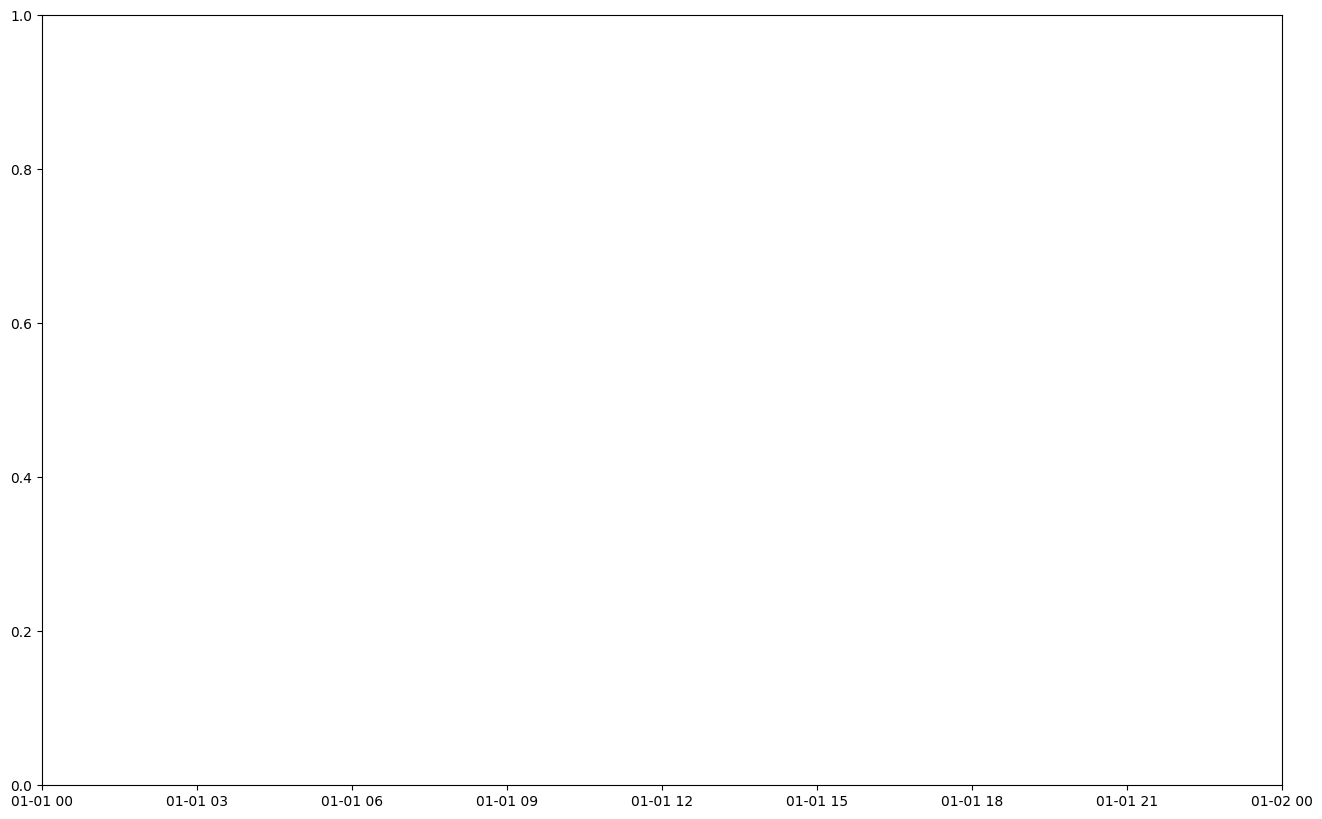

In [42]:
# all test data prediction graph
plt.figure(figsize=(16,10), dpi=100)
plt.plot(test_data.index, dataframe["Actual_Load"], label="Actual Load", marker='o')
# plt.plot(test_data.index, dataframe["Predicted_Load"], marker='o',label="Predicted Load", linestyle='dashed')
# plt.xlabel('Date')
# plt.ylabel('Load')
# plt.title('Actual Load vs Predicted Load')
# plt.xticks(rotation=30)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig("Load prediction graph of all test data.png")
# plt.show()

In [40]:
len(dataframe['Actual_Load']), len(dataframe['Predicted_Load'])

(722, 722)

In [41]:
dataframe.shape

(722, 2)

In [43]:
len(test_data.index)

723

In [ ]:
test_data.index